<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
#import dictionaries
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

# for cross validation

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict, train_test_split,cross_val_score
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt

#For Regularization

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV



%config InlineBackend.figure_format = 'retina'
%matplotlib inline

//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# this data represents various wind measurements taken at 6 different points in san francisco.  It ws found at the above link.  
#The hypothesis being tested is that the wind and the measured global horizontal irradiance measured are  highly correlated with the 
#target or wind velocity.

# read in the weather files into a data frame

weather_list=[]
directory = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/san_francisco/san_francisco/weather/'
flist = ['04','15','17','18','36','37']

for file_syllable in flist:
    filename = "SF" + file_syllable +'.csv'
    weather_list.append(pd.read_csv(directory+filename))

weather = pd.concat(weather_list)
weather.head()
weather.rename(columns = {'Interval_Minutes':'Interval','Wind_Velocity_Mtr_Sec':'Velocity','Wind_Direction_Variance_Deg':'Wind_Variance',
                           'Wind_Direction_Deg':'Wind_Direction','Ambient_Temperature_Deg_C':'Ambient_Temp','Global_Horizontal_Irradiance':'Irradiance'}
                           ,inplace=True)
print weather.shape
weather = weather[weather['Velocity'].notnull()]
print weather.shape
weather.describe()


(254287, 10)
(254232, 10)


,Interval,Velocity,Wind_Variance,Wind_Direction,Ambient_Temp,Irradiance
count,254232.0,254232.000000,254232.000000,254232.000000,254232.000000,254232.000000
mean,5.0,1.844396,11.334451,158.515257,14.489808,194.282441
std,0.0,1.577735,16.657000,121.503113,5.152112,288.043776
min,5.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.0,0.373000,0.000000,41.870000,11.650000,0.000000
50%,5.0,1.668000,0.023000,130.900000,13.820000,2.748000
75%,5.0,2.852000,18.370000,260.900000,16.630000,332.400000
max,5.0,9.550000,103.000000,360.000000,39.760000,1184.000000


In [3]:
weather.info()
weather.groupby('Station_Name').count()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 254232 entries, 0 to 32078
Data columns (total 10 columns):
Station_ID           254232 non-null object
Station_Name         254232 non-null object
Location_Label       254232 non-null object
Interval             254232 non-null int64
Interval_End_Time    254232 non-null object
Velocity             254232 non-null float64
Wind_Variance        254232 non-null float64
Wind_Direction       254232 non-null float64
Ambient_Temp         254232 non-null float64
Irradiance           254232 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 21.3+ MB


,Station_ID,Location_Label,Interval,Interval_End_Time,Velocity,Wind_Variance,Wind_Direction,Ambient_Temp,Irradiance
Station_Name,,,,,,,,,
Chinatown Medical Center,32079,32079,32079,32079,32079,32079,32079,32079,32079
Lincoln High School,12537,12537,12537,12537,12537,12537,12537,12537,12537
Muni Woods,52404,52404,52404,52404,52404,52404,52404,52404,52404
Pier 40,52404,52404,52404,52404,52404,52404,52404,52404,52404
"Pulgas Reservoir, San Mateo",52404,52404,52404,52404,52404,52404,52404,52404,52404
"Warnerville Switchyard, Oakdale",52404,52404,52404,52404,52404,52404,52404,52404,52404


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [4]:
#1 Target: Velocity, Predictors: Wind_Variance,Wind_Direction,Ambient_Temp,Irradiance
#2 Removed nulls, happy with rest of measurements
#3 Velocity ~ Ambient_Temp + Irradiance + Wind_Direction + Wind_Variance 
weather.head(10)

,Station_ID,Station_Name,Location_Label,Interval,Interval_End_Time,Velocity,Wind_Variance,Wind_Direction,Ambient_Temp,Irradiance
0,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:05,2.260,72.66,63.09,4.690,0.012
1,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:10,2.279,83.60,88.60,4.743,0.002
2,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:20,1.760,34.34,193.40,5.076,0.000
3,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:25,2.141,67.72,59.85,5.151,0.000
4,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:30,1.695,78.95,96.90,5.159,0.000
5,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:35,1.997,91.50,73.95,5.291,0.000
6,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:40,2.023,76.94,61.81,5.352,0.000
7,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:45,1.529,97.30,50.32,5.584,0.000
8,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:50,1.777,90.70,208.10,5.534,0.000
9,SF04,Lincoln High School,2162 24th Ave,5,2016-01-6? 08:55,1.724,95.40,18.92,5.601,0.000


In [5]:
#4 Set up the regression model (import patsy, Linear_Regression above)

formulae = 'Velocity ~ Ambient_Temp + Irradiance + Wind_Direction + Wind_Variance'
y = weather['Velocity']
X = weather[['Ambient_Temp', 'Irradiance','Wind_Direction','Wind_Variance']]
y,X = patsy.dmatrices(formulae,data=weather,return_type="dataframe")

lm = LinearRegression()
model = lm.fit(X,y)
scores = model.score(X,y)
yhats = model.predict(X)
print "R^2  \n%.5f \n" % scores
print model.coef_



R^2  
0.16947 

[[ 0.          0.00306484  0.00136324  0.00318737  0.00665374]]


(254232, 5)


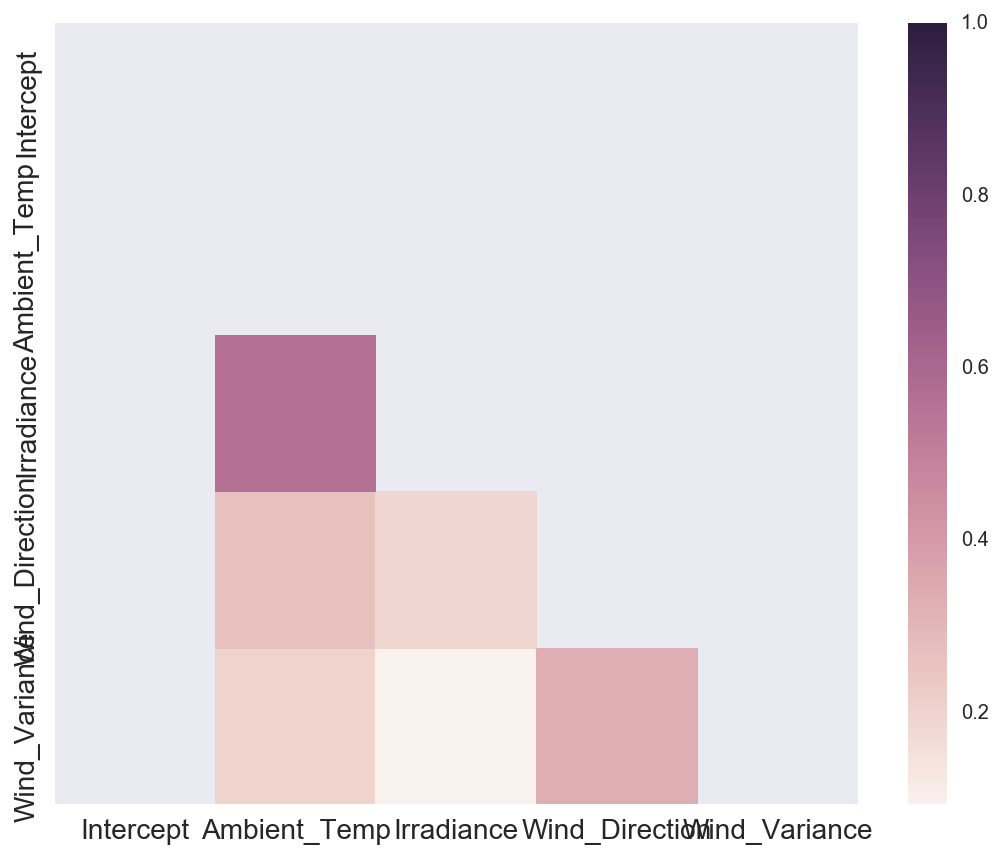

In [6]:

print X.shape
corr = X.corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [7]:
#Train / test model
#Expectation:  no suprise correlation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
scores = lm.score(X,y)
print "Train R^2: ", scores
predictions = lm.predict(X_test)
print "Test Score:", model.score(X_test, y_test)  

## The line / model
# ## The line / model
# plt.scatter(y_test, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")


Train R^2:  0.169462850677
Test Score: 0.175253421944


In [8]:
#Cross Validation / 6-fold
# Before we calc, what do we expect?   Given the looseness of the fit it is quit likely we will see some lower and possibly negative R quared


# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores

# # Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)

#  too many points to graph
# plt.scatter(y, predictions)
# plt.show()

#accuracy = metrics.r2_score(y, predictions)
#print "Cross-Predicted Accuracy:", accuracy
#print "Mean scores:", np.mean(scores)

Cross-validated scores: [ 0.01396761  0.1336247  -0.95692272  0.14798011 -0.30842716 -0.40592453]


In [9]:
# Grapshs approved to be problematic due to the sample size.
# In examining the relationship of Ambient Temperature on Wind Velocity, there was very little correlation or assoication 
#between the two.  Including additional variables into the linear regression (wind directin, variance etc..)  was not
#able to provide any material insight intno the correlation.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [10]:
#  Classically, R^2 is never negative.  However the model evolved and when you are predicting using a new dataset on the orignal model the 
# sum of squares error could increase to the point where the R quared is negative.  This could be symptomatic that the model is not a good fit.
# the model is run on actual data (to fit the model), then the sum of square error cannot exceed the sum of squares total.  1 - this ration will always be no greater than one.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [11]:
# read in the 8 files to a dataframe list and concatenate into a single df
# Hypotesizing the impact of key property features on overall appraised single family values

df_list=[]
directory = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/san_francisco/san_francisco/assessor_office/'
initial_year = 2007
end_year = 2015
for index in range(initial_year,end_year):
    filename = "assessor_data_" + str(index) + '_' + str(index+1)+'.csv'
    tempdf = pd.read_csv(directory+filename)
    tempdf['ROLLYEAR'] = tempdf['ROLLYEAR'].map(lambda x: index)
    df_list.append(tempdf)
assess_df = pd.concat(df_list)

assess_df.describe().T
assess_df.head()

//anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,BASELOT,BASELOTSFX,BATHS,BEDS,BUILTIN,CHGDATE,CONSTTYPE,DEPTH,EXEMPTYPE,FBA,...,RP1PRCLID,RP1RECDAT1,RP1STACDE,RP1TRACDE,RP1VOLUME,SQFT,STOREYNO,UNITS,YRBLT,ZONE
0,NaN,NaN,0,0,NaN,9908,NaN,0.0,NaN,0.0,...,0001 001,970216.0,N,1000.0,1,0,0,0,1900,P
1,NaN,NaN,0,0,NaN,9908,NaN,0.0,NaN,0.0,...,0002 001,690229.0,N,1000.0,1,0,0,0,1900,C2
2,NaN,NaN,0,0,NaN,9908,NaN,0.0,NaN,0.0,...,0004 002,791115.0,N,1000.0,1,0,0,0,0,C2
3,NaN,NaN,0,0,NaN,9908,NaN,0.0,NaN,0.0,...,0005 001,690229.0,N,1000.0,1,0,0,0,1900,C2
4,NaN,NaN,0,0,NaN,9908,NaN,0.0,NaN,0.0,...,0006 001,690229.0,N,1000.0,1,0,0,0,1900,C2


In [12]:
assess_df.shape

(1612110, 41)

In [13]:
#rename the relevant columns


assess_df.rename(columns= {'YRBLT':'Year_Built','BATHS':'Baths','BEDS':'Bedrooms','ROOMS':'Rooms','STOREYNO':'Stories',
                           'UNITS':'Units','DEPTH':'Lot_Depth','FRONT':'Lot_Frontage','SQFT':'Sqft','FBA':'Basement_Area','LAREA':'Lot_Area',
                           'OWNRPRCNT':'Ownership_Percent','RP1FXTVAL':'Fixtures_Values','RP1IMPVAL':'Improvement_Value','RP1LNDVAL':'Land_Value',
                           'RP1PPTVAL':'Prop_Value','ROLLYEAR':'Roll_Year'}, inplace = True)

#Calculate tota value

assess_df['Total_Value'] = assess_df['Fixtures_Values']+assess_df['Improvement_Value'] + assess_df['Prop_Value']+assess_df['Land_Value']

assess_df.shape




(1612110, 42)

In [14]:
#Exploring single family properties only

code_list = ['COS','D','DBM','LZ','LZB','M','TH','THB','Z','ZBM']
single_family_condition = ((assess_df['RP1CLACDE']=='COS')|(assess_df['RP1CLACDE']=='D')|(assess_df['RP1CLACDE']=='DBM')|
                           (assess_df['RP1CLACDE']=='LZ')|(assess_df['RP1CLACDE']=='LZBM')|(assess_df['RP1CLACDE']=='TH')|
                           (assess_df['RP1CLACDE']=='THBM')|(assess_df['RP1CLACDE']=='Z')|(assess_df['RP1CLACDE']=='ZBM'))
                           


assess_df = assess_df[single_family_condition]
assess_df.shape

(1113446, 42)

In [15]:
#Removes years outside of condition

year_condition = ((assess_df['Year_Built']>1850)&(assess_df['Year_Built']<=end_year+1))
assess_df = assess_df[year_condition]

#Updar Roll_Year

#assess_df['Roll_Year'] = assess_df['Roll_Year'].map(lambda x: x + 2000)

# Eliminate non negative property values

assess_df = assess_df[(assess_df['Total_Value']>10000)]

outlierlist = ['Baths','Bedrooms','Rooms','Sqft','Basement_Area','Lot_Area','Stories','Land_Value']

#Clean up some of the design field outliers

for field in outlierlist:
    assess_df = assess_df[((assess_df[field]>=0)&(assess_df[field]<=np.percentile(assess_df[field],95)))]

assess_df.shape



(788754, 42)

In [16]:
assess_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BASELOT,97482.0,0.469297,15.681327,0.0,NaN,NaN,NaN,937.00
Baths,788754.0,1.258525,0.606504,0.0,1.0,1.0,2.0,3.00
Bedrooms,788754.0,0.670312,1.073653,0.0,0.0,0.0,1.0,4.00
BUILTIN,97482.0,0.000000,0.000000,0.0,NaN,NaN,NaN,0.00
CHGDATE,788754.0,7837.963574,3904.825212,0.0,9504.0,9903.0,9908.0,9912.00
Lot_Depth,788754.0,7.305860,20.368747,0.0,0.0,0.0,0.0,99.87
Basement_Area,788754.0,11.480974,52.207666,0.0,0.0,0.0,0.0,350.00
Lot_Frontage,788754.0,0.018766,0.741479,0.0,0.0,0.0,0.0,87.50
Lot_Area,788754.0,1695.414706,1291.446133,0.0,0.0,2247.0,2809.0,3789.00
Ownership_Percent,788754.0,0.899344,0.212945,0.0,1.0,1.0,1.0,1.00


In [17]:
# Hypothesis is that for appraised SF single family appraised property value , multploe factors will play into the the value, 
#with the square footage expected to be the highest predictor

In [18]:
# For the regularization models it is important to standardize the variables.

Xlist = ['Total_Value','Roll_Year','Year_Built','Baths','Bedrooms','Rooms','Lot_Depth','Lot_Frontage', 'Sqft','Basement_Area','Lot_Area','Stories','Ownership_Percent']
X = assess_df[Xlist]
Xlist = Xlist[1:]
Xs = X
Xs.ix[:, Xlist] = (Xs.ix[:, Xlist] - Xs.ix[:, Xlist].mean()) / Xs.ix[:, Xlist].std()
print Xs.shape

# Use some string adding and joining to make the simple model formula:

formula_simple = ' + '.join(Xlist) + ' -1'
formulae = 'Total_Value ~ '+ formula_simple
print formulae
print type(formulae)
Xs.describe().T




//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(788754, 13)
Total_Value ~ Roll_Year + Year_Built + Baths + Bedrooms + Rooms + Lot_Depth + Lot_Frontage + Sqft + Basement_Area + Lot_Area + Stories + Ownership_Percent -1
<type 'str'>


,count,mean,std,min,25%,50%,75%,max
Total_Value,788754.0,3.723008e+05,265012.677575,10007.000000,139113.000000,326998.500000,558691.500000,2.692346e+06
Roll_Year,788754.0,4.991572e-13,1.000000,-1.525598,-1.088945,-0.215637,0.657670,1.530977e+00
Year_Built,788754.0,-1.240400e-14,1.000000,-2.538531,-0.706966,-0.179227,0.783120,2.086945e+00
Baths,788754.0,1.165847e-16,1.000000,-2.075050,-0.426255,-0.426255,1.222539,2.871333e+00
Bedrooms,788754.0,-8.339337e-14,1.000000,-0.624328,-0.624328,-0.624328,0.307072,3.101270e+00
Rooms,788754.0,-2.988114e-14,1.000000,-2.451147,-0.351623,0.173258,0.698139,1.747901e+00
Lot_Depth,788754.0,-3.397216e-14,1.000000,-0.358680,-0.358680,-0.358680,-0.358680,4.544420e+00
Lot_Frontage,788754.0,-9.795389e-15,1.000000,-0.025309,-0.025309,-0.025309,-0.025309,1.179821e+02
Sqft,788754.0,-3.404775e-15,1.000000,-3.231499,-0.653783,-0.045857,0.617819,2.754854e+00
Basement_Area,788754.0,-8.635464e-15,1.000000,-0.219910,-0.219910,-0.219910,-0.219910,6.484087e+00


In [19]:
Xs.head()

,Total_Value,Roll_Year,Year_Built,Baths,Bedrooms,Rooms,Lot_Depth,Lot_Frontage,Sqft,Basement_Area,Lot_Area,Stories,Ownership_Percent
69,920701.0,-1.525598,1.652337,-2.07505,-0.624328,-2.451147,-0.35868,-0.025309,0.702770,-0.21991,-1.312803,-1.642897,0.472687
71,1026966.0,-1.525598,1.652337,-2.07505,-0.624328,-2.451147,-0.35868,-0.025309,0.070950,-0.21991,-1.312803,-1.642897,0.472687
72,437092.0,-1.525598,1.652337,-2.07505,-0.624328,-2.451147,-0.35868,-0.025309,1.748722,-0.21991,-1.312803,-1.642897,0.472687
73,992374.0,-1.525598,1.652337,-2.07505,-0.624328,-2.451147,-0.35868,-0.025309,1.629261,-0.21991,-1.312803,-1.642897,0.472687
74,1180927.0,-1.525598,1.652337,-2.07505,-0.624328,-2.451147,-0.35868,-0.025309,1.236365,-0.21991,-1.312803,-1.642897,0.472687


In [20]:
# scaler = StandardScaler()
# X_s = scaler.fit_transform(X)

# #Other normalization code that I want to keep sight of

# # select all the columns that are not the target
# nc = [x for x in wine.columns if x != target]

# # Using the .ix indexing syntax, subtract mean and divide by standard deviation for all predictor columns.
# #
# # Remember: .ix indexing notation works like: data.ix[row_indices, column_indices]
# # .ix is able to take a mix of boolean, number, or string specifications, which is useful.
# #
# # By subtracting the mean and dividing by the standard devation, the normalization procedure is putting 
# # all of the predictor variables on the same scale (distributions with mean == 0 and standard deviation == 1)
# wine.ix[:, nc] = (wine.ix[:, nc] - wine.ix[:, nc].mean()) / wine.ix[:, nc].std()

In [21]:
#4 Set up the regression model using Patsy
y,X = patsy.dmatrices(formulae,data=Xs,return_type="dataframe")
lm = LinearRegression()
model = lm.fit(X,y)
scores = model.score(X,y)
yhats = model.predict(X)
print "R^2  \n%.5f \n" % scores
print model.coef_

R^2  
0.19723 

[[ 14393.55269899  -3240.23524451  14473.51858615  48927.14145885
  -47430.34370405   4133.41090249   3419.45497577  61164.7107712
   -2735.63425409 -58540.76017432 -17929.76648488 -28358.90950438]]


In [22]:
y.shape

(788754, 1)

In [23]:
#Train / test model
#Expectation:  no suprise correlation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
scores = lm.score(X,y)
print "Train R^2: ", scores
predictions = lm.predict(X_test)
print "Test Score:", model.score(X_test, y_test)  

Train R^2:  0.197223000143
Test Score: 0.200743196678


In [24]:
#Train / test model
#Expectation:  no suprise correlation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
scores = lm.score(X,y)
print "Train R^2: ", scores
predictions = lm.predict(X_test)
print "Test Score:", model.score(X_test, y_test)  

Train R^2:  0.197220512968
Test Score: 0.198897449759


In [25]:
#Cross Validation / 6-fold
# Before we calc, what do we expect?   Given the looseness of the fit it is quit likely we will see some lower and possibly negative R quared

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores

# # Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)


Cross-validated scores: [ 0.1673569   0.18851287  0.1742989   0.20144278  0.21485576  0.20237009]


In [26]:
# To begin with the regularization, start with Ridge CV to determine an optimal startaing alpha
# Ridge First
ridge_alphas = np.logspace(0, 5, 30)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)

print optimal_ridge.alpha_

853.167852417


In [27]:
#With the optimal alpha let's check out the ridge model

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.17193564  0.18029207  0.15592685  0.20534999  0.16231004  0.21028291
  0.21501198  0.16949086  0.22513921  0.19495879]
0.18906983353


In [28]:
#Lasso

y = np.ravel(y)
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X, y)

print optimal_lasso.alpha_


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

83.8480881107


In [29]:
#Review the lasso results

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.17194701  0.18034563  0.15588344  0.2053614   0.16230888  0.21026825
  0.21497471  0.16948391  0.22512045  0.19497778]
0.189067146755


In [30]:
l1_ratios = np.linspace(0.01, 1.0, 5)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(X, y)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

83.8480881107
1.0


In [31]:
#"L1 -----> Lasso"

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [32]:
pathr = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/san_francisco/san_francisco/parks/park_scores.csv'
pathd = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/san_francisco/san_francisco/parks/park_donations.csv'
park_ratings = pd.read_csv(pathr)
park_donations = pd.read_csv(pathd)

park_donations.rename(columns= {'Account Name':'Park','Close Date':'Date'},inplace = True)
park_donations['Amount'] = park_donations['Amount'].map(lambda x: float(x.replace('$','')))
park_donations['Park'] =park_donations['Park'].map(lambda x: x[0:10])
park_donations['Year'] = park_donations['Date'].map(lambda x: int(x[6:10]))
park_ratings['Year'] = park_ratings['FQ'].map(lambda x: int("20"+x[2:4]))
park_ratings['Park'] =park_ratings['Park'].map(lambda x: x[0:10])

s = pd.merge(park_ratings, park_donations, on=['Park','Year'], how='left')
print park_donations['Date'].dtype
park_ratings.shape
#s1 = pd.merge(df1, df2, how='left', on=['Year', 'Week', 'Colour'])
s = s[s['Amount'].notnull()]
s.describe()
print s.shape
s

object
(8, 10)


,ParkID,PSA,Park,FQ,Score,Year,Date,Description,Amount,Type
3477,117,PSA2,Alamo Squa,FY12Q1,0.987,2012,01/10/2012 12:00:00 AM,To support the cost of a comprehensive Alamo S...,4500.00,In-kind
3659,117,PSA2,Alamo Squa,FY12Q2,1.000,2012,01/10/2012 12:00:00 AM,To support the cost of a comprehensive Alamo S...,4500.00,In-kind
3853,117,PSA2,Alamo Squa,FY12Q3,0.966,2012,01/10/2012 12:00:00 AM,To support the cost of a comprehensive Alamo S...,4500.00,In-kind
3949,117,PSA2,Alamo Squa,FY12Q4,0.954,2012,01/10/2012 12:00:00 AM,To support the cost of a comprehensive Alamo S...,4500.00,In-kind
4744,155,PSA1,Muriel Lef,FY14Q1,0.900,2014,04/01/2014 12:00:00 AM,To support new plantings during Muriel Leff Mi...,804.45,Cash
4967,155,PSA1,Muriel Lef,FY14Q2,0.929,2014,04/01/2014 12:00:00 AM,To support new plantings during Muriel Leff Mi...,804.45,Cash
5247,155,PSA1,Muriel Lef,FY14Q3,1.000,2014,04/01/2014 12:00:00 AM,To support new plantings during Muriel Leff Mi...,804.45,Cash
5348,155,PSA1,Muriel Lef,FY14Q4,1.000,2014,04/01/2014 12:00:00 AM,To support new plantings during Muriel Leff Mi...,804.45,Cash


In [33]:
# Unsuccesful -- insufficient data to join and draw a conclusion

#Will look at the zillow data and see if dated data can help predict the future.



In [34]:
pathzillow = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/san_francisco/san_francisco/zillow_property_sales/zillow_mediansale_persqft_neighborhood.csv'
zillow = pd.read_csv(pathzillow)
formulae = ''
for x in range(1996,2017):
    yr = str(x)
    current = yr+"-06"
    newyr = "Yr"+yr
    zillow.rename(columns= {current:newyr},inplace = True)
    zillow[newyr] = zillow[newyr].map(lambda x: float(x)) 
    zillow = zillow[zillow[newyr].notnull()]    
    if x <= 2015:
        formulae = formulae  + newyr +"+"
    else:
        formulae = newyr + " ~ " + formulae

formulae = formulae[:-1]
form = formulae[0:113]
form

'Yr2016 ~ Yr1996+Yr1997+Yr1998+Yr1999+Yr2000+Yr2001+Yr2002+Yr2003+Yr2004+Yr2005+Yr2006+Yr2007+Yr2008+Yr2009+Yr2010'

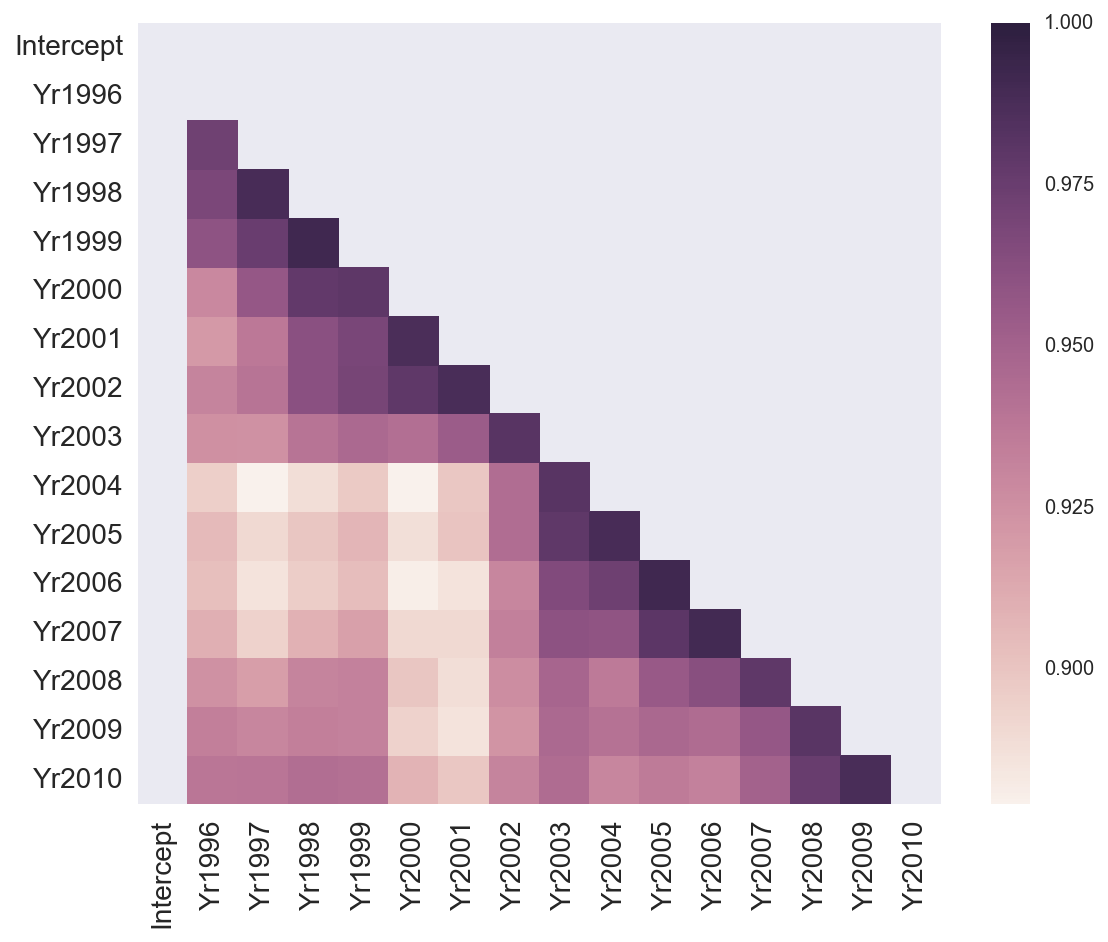

In [35]:
# set up patsy and take a look at the correlation matrix
y,X = patsy.dmatrices(form,data=zillow,return_type="dataframe")

                      
corr = X.corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()
                               


In [36]:
#1996 thru 2010 Examining the lag effect of values

y,X = patsy.dmatrices(form,data=zillow,return_type="dataframe")
lm = LinearRegression()
model = lm.fit(X,y)
scores = model.score(X,y)
yhats = model.predict(X)
print "R^2  \n%.5f \n" % scores
print model.coef_

R^2  
0.97464 

[[  0.00000000e+00  -4.15024510e-01  -1.87545952e+00   1.91074138e+00
   -6.54770919e-01   7.02376230e-01   7.77323254e-01  -7.04551704e-01
    1.73604916e-01  -6.73337334e-02  -1.01977890e-01   1.44675097e-01
    3.04391269e-01   3.34506194e-02   4.74035059e-04   8.34004254e-01]]


In [37]:
#Train / test model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
scores = lm.score(X,y)
print "Train R^2: ", scores
predictions = lm.predict(X_test)
print "Test Score:", model.score(X_test, y_test)  

Train R^2:  0.972358809462
Test Score: 0.96564862312


In [38]:
#Cross Validation / 6-fold
# Before we calc, what do we expect?   Given the looseness of the fit it is quit likely we will see some lower and possibly negative R quared

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores

# # Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)


Cross-validated scores: [ 0.96806055  0.97245055  0.93336732  0.97972548  0.9568644   0.92163874]


In [39]:
# To begin with the regularization, start with Ridge CV to determine an optimal startaing alpha
# Ridge First
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)

print optimal_ridge.alpha_

11758.4955405


In [40]:
#With the optimal alpha let's check out the ridge model

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.94680049  0.97741378  0.99027524  0.96848124  0.92755018  0.99052678
  0.96168897  0.93002727  0.98950223  0.88061119]
0.956287736189


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?